In [26]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import utils as u

#For traditional ML
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

#For Active Learning
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

NOTE : The data required for this code is made available at : https://drive.google.com/drive/folders/1Ll5QrfNmgqL4XLM0Of1Tz3mw3noKTuRR?usp=drive_link

AL for T_eff

In [27]:
file_name = 'data_output_for_AL_teff.pkl'
n_features = 9
X_train, X_pool, X_test, y_train, y_pool, y_test = u.load_pkl_data_for_AL(file_name)
X_train, X_pool, X_test = X_train[:,:n_features], X_pool[:,:n_features], X_test[:,:n_features]

print(X_train.shape, y_train.shape)
print(X_pool.shape, y_pool.shape)
print(X_test.shape, y_test.shape)

(200, 9) (200,)
(47108, 9) (47108,)
(11777, 9) (11777,)


In [28]:
# Initialize the ActiveLearner
# The ActiveLearner is initialized with a logistic regression model as the base estimator.
learner = ActiveLearner(
    estimator=RandomForestClassifier(n_estimators=200),
    query_strategy=uncertainty_sampling,
    X_training=X_train, y_training=y_train
)

In [29]:
# Check the initial accuracy of the model
# The initial accuracy is calculated on the test set before any active learning queries.
initial_accuracy = learner.score(X_test, y_test)
print(f'Initial Accuracy: {initial_accuracy:.4f}')

Initial Accuracy: 0.7648


In [30]:
# # The Active Learning Loop
# # The loop continues until a specified number of queries is reached.
# n_queries = 10 # Number of queries to perform
# for i in range(n_queries):
#     query_idx, query_instance = learner.query(X_pool)  # Ask: "Which sample should I label?"
#     learner.teach(X_pool[query_idx], y_pool[query_idx])  # Label it and learn from it
    
#     # Remove it from pool
#     X_pool = np.delete(X_pool, query_idx, axis=0)
#     y_pool = np.delete(y_pool, query_idx, axis=0)

#     print(f'Query {i+1}, Accuracy: {learner.score(X_test, y_test):.4f}')

In [31]:
# Here i am using a stopping criterion based on the accuracy plateau.
# querie_budget = 100
# prev_accuracy = 0
# threshold = 0.000001  
# for i in range(querie_budget):
#     query_idx, query_instance = learner.query(X_pool)
#     learner.teach(X_pool[query_idx], y_pool[query_idx])

#     X_pool = np.delete(X_pool, query_idx, axis=0)
#     y_pool = np.delete(y_pool, query_idx, axis=0)

#     new_accuracy = learner.score(X_test, y_test)
#     print(f'Query {i+1}, Accuracy: {new_accuracy:.4f}')

#     if abs(new_accuracy - prev_accuracy) < threshold:
#         print("Stopping: performance has plateaued.")
#         break
#     prev_accuracy = new_accuracy

In [32]:
n_queries = 250  # Number of queries to perform
query_indices_list_teff,accuracy_score_list_teff =[],[]
# The number of queries to perform in the active learning loop.
for i in range(n_queries):
    query_idx, query_instance = learner.query(X_pool)
    learner.teach(X_pool[query_idx], y_pool[query_idx])

    # Remove the labeled point from the pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx, axis=0)

    # Predictions on test set
    y_pred = learner.predict(X_test)

    # Accuracy
    acc = learner.score(X_test, y_test)
    accuracy_score_list_teff.append(acc)
    query_indices_list_teff.append(i+1)
    print(f"\n Query {i+1} — Accuracy: {acc:.4f}")
    print(f"size of train : {X_train.shape[0]} , size of pool : {X_pool.shape[0]}, size of test : {X_test.shape[0]}")

    # cm = confusion_matrix(y_test, y_pred,labels=[0,1,2,3,4,5,6])

    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["M", "K", "G", "F", "A", "B", "O"])

    # disp.plot(cmap=plt.cm.Blues)
    # plt.title(f"Confusion Matrix — Query {i+1} — Accuracy: {acc:.4f}", fontsize=12, pad=20)
    # plt.xlabel('Prediction', fontsize=11)
    # plt.ylabel('Actual', fontsize=11)
    # plt.gca().xaxis.set_label_position('top')
    # plt.gca().xaxis.tick_top()
    # plt.gca().figure.subplots_adjust(bottom=0.1)
    # # plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)

    # plt.show()


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 1 — Accuracy: 0.7655
size of train : 200 , size of pool : 47107, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 2 — Accuracy: 0.7613
size of train : 200 , size of pool : 47106, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 3 — Accuracy: 0.7661
size of train : 200 , size of pool : 47105, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 4 — Accuracy: 0.7624
size of train : 200 , size of pool : 47104, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 5 — Accuracy: 0.7638
size of train : 200 , size of pool : 47103, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 6 — Accuracy: 0.7678
size of train : 200 , size of pool : 47102, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 7 — Accuracy: 0.7625
size of train : 200 , size of pool : 47101, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 8 — Accuracy: 0.7683
size of train : 200 , size of pool : 47100, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 9 — Accuracy: 0.7726
size of train : 200 , size of pool : 47099, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 10 — Accuracy: 0.7693
size of train : 200 , size of pool : 47098, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 11 — Accuracy: 0.7702
size of train : 200 , size of pool : 47097, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 12 — Accuracy: 0.7667
size of train : 200 , size of pool : 47096, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 13 — Accuracy: 0.7683
size of train : 200 , size of pool : 47095, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 14 — Accuracy: 0.7735
size of train : 200 , size of pool : 47094, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 15 — Accuracy: 0.7754
size of train : 200 , size of pool : 47093, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 16 — Accuracy: 0.7690
size of train : 200 , size of pool : 47092, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 17 — Accuracy: 0.7701
size of train : 200 , size of pool : 47091, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 18 — Accuracy: 0.7711
size of train : 200 , size of pool : 47090, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 19 — Accuracy: 0.7678
size of train : 200 , size of pool : 47089, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 20 — Accuracy: 0.7690
size of train : 200 , size of pool : 47088, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 21 — Accuracy: 0.7673
size of train : 200 , size of pool : 47087, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 22 — Accuracy: 0.7739
size of train : 200 , size of pool : 47086, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 23 — Accuracy: 0.7662
size of train : 200 , size of pool : 47085, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 24 — Accuracy: 0.7707
size of train : 200 , size of pool : 47084, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 25 — Accuracy: 0.7709
size of train : 200 , size of pool : 47083, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 26 — Accuracy: 0.7736
size of train : 200 , size of pool : 47082, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 27 — Accuracy: 0.7729
size of train : 200 , size of pool : 47081, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 28 — Accuracy: 0.7724
size of train : 200 , size of pool : 47080, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 29 — Accuracy: 0.7668
size of train : 200 , size of pool : 47079, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 30 — Accuracy: 0.7734
size of train : 200 , size of pool : 47078, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 31 — Accuracy: 0.7703
size of train : 200 , size of pool : 47077, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 32 — Accuracy: 0.7757
size of train : 200 , size of pool : 47076, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 33 — Accuracy: 0.7668
size of train : 200 , size of pool : 47075, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 34 — Accuracy: 0.7699
size of train : 200 , size of pool : 47074, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 35 — Accuracy: 0.7712
size of train : 200 , size of pool : 47073, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 36 — Accuracy: 0.7724
size of train : 200 , size of pool : 47072, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 37 — Accuracy: 0.7758
size of train : 200 , size of pool : 47071, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 38 — Accuracy: 0.7744
size of train : 200 , size of pool : 47070, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 39 — Accuracy: 0.7718
size of train : 200 , size of pool : 47069, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 40 — Accuracy: 0.7807
size of train : 200 , size of pool : 47068, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 41 — Accuracy: 0.7755
size of train : 200 , size of pool : 47067, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 42 — Accuracy: 0.7793
size of train : 200 , size of pool : 47066, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 43 — Accuracy: 0.7751
size of train : 200 , size of pool : 47065, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 44 — Accuracy: 0.7772
size of train : 200 , size of pool : 47064, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 45 — Accuracy: 0.7842
size of train : 200 , size of pool : 47063, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 46 — Accuracy: 0.7766
size of train : 200 , size of pool : 47062, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 47 — Accuracy: 0.7796
size of train : 200 , size of pool : 47061, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 48 — Accuracy: 0.7779
size of train : 200 , size of pool : 47060, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 49 — Accuracy: 0.7796
size of train : 200 , size of pool : 47059, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 50 — Accuracy: 0.7775
size of train : 200 , size of pool : 47058, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 51 — Accuracy: 0.7752
size of train : 200 , size of pool : 47057, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 52 — Accuracy: 0.7764
size of train : 200 , size of pool : 47056, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 53 — Accuracy: 0.7740
size of train : 200 , size of pool : 47055, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 54 — Accuracy: 0.7720
size of train : 200 , size of pool : 47054, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 55 — Accuracy: 0.7757
size of train : 200 , size of pool : 47053, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 56 — Accuracy: 0.7802
size of train : 200 , size of pool : 47052, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 57 — Accuracy: 0.7773
size of train : 200 , size of pool : 47051, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 58 — Accuracy: 0.7809
size of train : 200 , size of pool : 47050, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 59 — Accuracy: 0.7751
size of train : 200 , size of pool : 47049, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 60 — Accuracy: 0.7758
size of train : 200 , size of pool : 47048, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 61 — Accuracy: 0.7798
size of train : 200 , size of pool : 47047, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 62 — Accuracy: 0.7830
size of train : 200 , size of pool : 47046, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 63 — Accuracy: 0.7808
size of train : 200 , size of pool : 47045, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 64 — Accuracy: 0.7788
size of train : 200 , size of pool : 47044, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 65 — Accuracy: 0.7797
size of train : 200 , size of pool : 47043, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 66 — Accuracy: 0.7797
size of train : 200 , size of pool : 47042, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 67 — Accuracy: 0.7785
size of train : 200 , size of pool : 47041, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 68 — Accuracy: 0.7780
size of train : 200 , size of pool : 47040, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 69 — Accuracy: 0.7840
size of train : 200 , size of pool : 47039, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 70 — Accuracy: 0.7838
size of train : 200 , size of pool : 47038, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 71 — Accuracy: 0.7797
size of train : 200 , size of pool : 47037, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 72 — Accuracy: 0.7825
size of train : 200 , size of pool : 47036, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 73 — Accuracy: 0.7781
size of train : 200 , size of pool : 47035, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 74 — Accuracy: 0.7807
size of train : 200 , size of pool : 47034, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 75 — Accuracy: 0.7791
size of train : 200 , size of pool : 47033, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 76 — Accuracy: 0.7812
size of train : 200 , size of pool : 47032, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 77 — Accuracy: 0.7827
size of train : 200 , size of pool : 47031, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 78 — Accuracy: 0.7783
size of train : 200 , size of pool : 47030, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 79 — Accuracy: 0.7839
size of train : 200 , size of pool : 47029, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 80 — Accuracy: 0.7741
size of train : 200 , size of pool : 47028, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 81 — Accuracy: 0.7812
size of train : 200 , size of pool : 47027, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 82 — Accuracy: 0.7770
size of train : 200 , size of pool : 47026, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 83 — Accuracy: 0.7783
size of train : 200 , size of pool : 47025, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 84 — Accuracy: 0.7779
size of train : 200 , size of pool : 47024, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 85 — Accuracy: 0.7756
size of train : 200 , size of pool : 47023, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 86 — Accuracy: 0.7797
size of train : 200 , size of pool : 47022, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 87 — Accuracy: 0.7797
size of train : 200 , size of pool : 47021, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 88 — Accuracy: 0.7790
size of train : 200 , size of pool : 47020, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 89 — Accuracy: 0.7808
size of train : 200 , size of pool : 47019, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 90 — Accuracy: 0.7804
size of train : 200 , size of pool : 47018, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 91 — Accuracy: 0.7802
size of train : 200 , size of pool : 47017, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 92 — Accuracy: 0.7786
size of train : 200 , size of pool : 47016, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 93 — Accuracy: 0.7793
size of train : 200 , size of pool : 47015, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 94 — Accuracy: 0.7828
size of train : 200 , size of pool : 47014, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 95 — Accuracy: 0.7764
size of train : 200 , size of pool : 47013, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 96 — Accuracy: 0.7823
size of train : 200 , size of pool : 47012, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 97 — Accuracy: 0.7812
size of train : 200 , size of pool : 47011, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 98 — Accuracy: 0.7814
size of train : 200 , size of pool : 47010, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 99 — Accuracy: 0.7845
size of train : 200 , size of pool : 47009, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 100 — Accuracy: 0.7824
size of train : 200 , size of pool : 47008, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 101 — Accuracy: 0.7840
size of train : 200 , size of pool : 47007, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 102 — Accuracy: 0.7776
size of train : 200 , size of pool : 47006, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 103 — Accuracy: 0.7799
size of train : 200 , size of pool : 47005, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 104 — Accuracy: 0.7815
size of train : 200 , size of pool : 47004, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 105 — Accuracy: 0.7814
size of train : 200 , size of pool : 47003, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 106 — Accuracy: 0.7808
size of train : 200 , size of pool : 47002, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 107 — Accuracy: 0.7769
size of train : 200 , size of pool : 47001, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 108 — Accuracy: 0.7859
size of train : 200 , size of pool : 47000, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 109 — Accuracy: 0.7856
size of train : 200 , size of pool : 46999, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 110 — Accuracy: 0.7851
size of train : 200 , size of pool : 46998, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 111 — Accuracy: 0.7808
size of train : 200 , size of pool : 46997, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 112 — Accuracy: 0.7820
size of train : 200 , size of pool : 46996, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 113 — Accuracy: 0.7817
size of train : 200 , size of pool : 46995, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 114 — Accuracy: 0.7817
size of train : 200 , size of pool : 46994, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 115 — Accuracy: 0.7814
size of train : 200 , size of pool : 46993, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 116 — Accuracy: 0.7808
size of train : 200 , size of pool : 46992, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 117 — Accuracy: 0.7806
size of train : 200 , size of pool : 46991, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 118 — Accuracy: 0.7833
size of train : 200 , size of pool : 46990, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 119 — Accuracy: 0.7885
size of train : 200 , size of pool : 46989, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 120 — Accuracy: 0.7829
size of train : 200 , size of pool : 46988, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 121 — Accuracy: 0.7862
size of train : 200 , size of pool : 46987, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 122 — Accuracy: 0.7841
size of train : 200 , size of pool : 46986, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 123 — Accuracy: 0.7881
size of train : 200 , size of pool : 46985, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 124 — Accuracy: 0.7848
size of train : 200 , size of pool : 46984, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 125 — Accuracy: 0.7899
size of train : 200 , size of pool : 46983, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 126 — Accuracy: 0.7828
size of train : 200 , size of pool : 46982, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 127 — Accuracy: 0.7848
size of train : 200 , size of pool : 46981, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 128 — Accuracy: 0.7780
size of train : 200 , size of pool : 46980, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 129 — Accuracy: 0.7833
size of train : 200 , size of pool : 46979, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 130 — Accuracy: 0.7842
size of train : 200 , size of pool : 46978, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 131 — Accuracy: 0.7870
size of train : 200 , size of pool : 46977, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 132 — Accuracy: 0.7871
size of train : 200 , size of pool : 46976, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 133 — Accuracy: 0.7876
size of train : 200 , size of pool : 46975, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 134 — Accuracy: 0.7870
size of train : 200 , size of pool : 46974, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 135 — Accuracy: 0.7864
size of train : 200 , size of pool : 46973, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 136 — Accuracy: 0.7864
size of train : 200 , size of pool : 46972, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 137 — Accuracy: 0.7888
size of train : 200 , size of pool : 46971, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 138 — Accuracy: 0.7859
size of train : 200 , size of pool : 46970, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 139 — Accuracy: 0.7876
size of train : 200 , size of pool : 46969, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 140 — Accuracy: 0.7822
size of train : 200 , size of pool : 46968, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 141 — Accuracy: 0.7852
size of train : 200 , size of pool : 46967, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 142 — Accuracy: 0.7881
size of train : 200 , size of pool : 46966, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 143 — Accuracy: 0.7918
size of train : 200 , size of pool : 46965, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 144 — Accuracy: 0.7874
size of train : 200 , size of pool : 46964, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 145 — Accuracy: 0.7884
size of train : 200 , size of pool : 46963, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 146 — Accuracy: 0.7893
size of train : 200 , size of pool : 46962, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 147 — Accuracy: 0.7926
size of train : 200 , size of pool : 46961, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 148 — Accuracy: 0.7948
size of train : 200 , size of pool : 46960, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 149 — Accuracy: 0.7932
size of train : 200 , size of pool : 46959, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 150 — Accuracy: 0.7927
size of train : 200 , size of pool : 46958, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 151 — Accuracy: 0.7888
size of train : 200 , size of pool : 46957, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 152 — Accuracy: 0.7923
size of train : 200 , size of pool : 46956, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 153 — Accuracy: 0.7884
size of train : 200 , size of pool : 46955, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 154 — Accuracy: 0.7913
size of train : 200 , size of pool : 46954, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 155 — Accuracy: 0.7930
size of train : 200 , size of pool : 46953, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 156 — Accuracy: 0.7929
size of train : 200 , size of pool : 46952, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 157 — Accuracy: 0.7945
size of train : 200 , size of pool : 46951, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 158 — Accuracy: 0.7940
size of train : 200 , size of pool : 46950, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 159 — Accuracy: 0.7946
size of train : 200 , size of pool : 46949, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 160 — Accuracy: 0.7926
size of train : 200 , size of pool : 46948, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 161 — Accuracy: 0.7977
size of train : 200 , size of pool : 46947, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 162 — Accuracy: 0.7929
size of train : 200 , size of pool : 46946, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 163 — Accuracy: 0.7926
size of train : 200 , size of pool : 46945, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 164 — Accuracy: 0.7939
size of train : 200 , size of pool : 46944, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 165 — Accuracy: 0.7984
size of train : 200 , size of pool : 46943, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 166 — Accuracy: 0.7986
size of train : 200 , size of pool : 46942, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 167 — Accuracy: 0.7999
size of train : 200 , size of pool : 46941, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 168 — Accuracy: 0.7966
size of train : 200 , size of pool : 46940, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 169 — Accuracy: 0.7983
size of train : 200 , size of pool : 46939, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 170 — Accuracy: 0.7974
size of train : 200 , size of pool : 46938, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 171 — Accuracy: 0.7958
size of train : 200 , size of pool : 46937, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 172 — Accuracy: 0.7902
size of train : 200 , size of pool : 46936, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 173 — Accuracy: 0.7985
size of train : 200 , size of pool : 46935, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 174 — Accuracy: 0.7946
size of train : 200 , size of pool : 46934, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 175 — Accuracy: 0.7950
size of train : 200 , size of pool : 46933, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 176 — Accuracy: 0.7968
size of train : 200 , size of pool : 46932, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 177 — Accuracy: 0.7961
size of train : 200 , size of pool : 46931, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 178 — Accuracy: 0.7937
size of train : 200 , size of pool : 46930, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 179 — Accuracy: 0.7929
size of train : 200 , size of pool : 46929, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 180 — Accuracy: 0.7961
size of train : 200 , size of pool : 46928, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 181 — Accuracy: 0.7932
size of train : 200 , size of pool : 46927, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 182 — Accuracy: 0.7956
size of train : 200 , size of pool : 46926, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 183 — Accuracy: 0.8006
size of train : 200 , size of pool : 46925, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 184 — Accuracy: 0.7977
size of train : 200 , size of pool : 46924, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 185 — Accuracy: 0.7988
size of train : 200 , size of pool : 46923, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 186 — Accuracy: 0.7971
size of train : 200 , size of pool : 46922, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 187 — Accuracy: 0.7977
size of train : 200 , size of pool : 46921, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 188 — Accuracy: 0.8020
size of train : 200 , size of pool : 46920, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 189 — Accuracy: 0.7983
size of train : 200 , size of pool : 46919, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 190 — Accuracy: 0.7961
size of train : 200 , size of pool : 46918, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 191 — Accuracy: 0.7953
size of train : 200 , size of pool : 46917, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 192 — Accuracy: 0.8011
size of train : 200 , size of pool : 46916, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 193 — Accuracy: 0.7983
size of train : 200 , size of pool : 46915, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 194 — Accuracy: 0.7994
size of train : 200 , size of pool : 46914, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 195 — Accuracy: 0.7998
size of train : 200 , size of pool : 46913, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 196 — Accuracy: 0.7971
size of train : 200 , size of pool : 46912, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 197 — Accuracy: 0.7999
size of train : 200 , size of pool : 46911, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 198 — Accuracy: 0.7967
size of train : 200 , size of pool : 46910, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 199 — Accuracy: 0.7999
size of train : 200 , size of pool : 46909, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 200 — Accuracy: 0.8010
size of train : 200 , size of pool : 46908, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 201 — Accuracy: 0.8028
size of train : 200 , size of pool : 46907, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 202 — Accuracy: 0.7985
size of train : 200 , size of pool : 46906, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 203 — Accuracy: 0.8001
size of train : 200 , size of pool : 46905, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 204 — Accuracy: 0.8016
size of train : 200 , size of pool : 46904, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 205 — Accuracy: 0.7929
size of train : 200 , size of pool : 46903, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 206 — Accuracy: 0.7995
size of train : 200 , size of pool : 46902, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 207 — Accuracy: 0.7988
size of train : 200 , size of pool : 46901, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 208 — Accuracy: 0.8026
size of train : 200 , size of pool : 46900, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 209 — Accuracy: 0.7971
size of train : 200 , size of pool : 46899, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 210 — Accuracy: 0.7988
size of train : 200 , size of pool : 46898, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 211 — Accuracy: 0.8022
size of train : 200 , size of pool : 46897, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 212 — Accuracy: 0.7984
size of train : 200 , size of pool : 46896, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 213 — Accuracy: 0.8020
size of train : 200 , size of pool : 46895, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 214 — Accuracy: 0.7996
size of train : 200 , size of pool : 46894, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 215 — Accuracy: 0.8010
size of train : 200 , size of pool : 46893, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 216 — Accuracy: 0.7993
size of train : 200 , size of pool : 46892, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 217 — Accuracy: 0.8065
size of train : 200 , size of pool : 46891, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 218 — Accuracy: 0.8024
size of train : 200 , size of pool : 46890, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 219 — Accuracy: 0.7994
size of train : 200 , size of pool : 46889, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 220 — Accuracy: 0.7989
size of train : 200 , size of pool : 46888, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 221 — Accuracy: 0.8039
size of train : 200 , size of pool : 46887, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 222 — Accuracy: 0.8029
size of train : 200 , size of pool : 46886, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 223 — Accuracy: 0.8008
size of train : 200 , size of pool : 46885, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 224 — Accuracy: 0.8050
size of train : 200 , size of pool : 46884, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 225 — Accuracy: 0.8017
size of train : 200 , size of pool : 46883, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 226 — Accuracy: 0.8015
size of train : 200 , size of pool : 46882, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 227 — Accuracy: 0.7999
size of train : 200 , size of pool : 46881, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 228 — Accuracy: 0.7990
size of train : 200 , size of pool : 46880, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 229 — Accuracy: 0.8006
size of train : 200 , size of pool : 46879, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 230 — Accuracy: 0.7999
size of train : 200 , size of pool : 46878, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 231 — Accuracy: 0.8029
size of train : 200 , size of pool : 46877, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 232 — Accuracy: 0.8044
size of train : 200 , size of pool : 46876, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 233 — Accuracy: 0.8011
size of train : 200 , size of pool : 46875, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 234 — Accuracy: 0.8023
size of train : 200 , size of pool : 46874, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 235 — Accuracy: 0.8016
size of train : 200 , size of pool : 46873, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 236 — Accuracy: 0.8009
size of train : 200 , size of pool : 46872, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 237 — Accuracy: 0.8009
size of train : 200 , size of pool : 46871, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 238 — Accuracy: 0.7989
size of train : 200 , size of pool : 46870, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 239 — Accuracy: 0.7999
size of train : 200 , size of pool : 46869, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 240 — Accuracy: 0.8038
size of train : 200 , size of pool : 46868, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 241 — Accuracy: 0.8040
size of train : 200 , size of pool : 46867, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 242 — Accuracy: 0.8070
size of train : 200 , size of pool : 46866, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 243 — Accuracy: 0.8024
size of train : 200 , size of pool : 46865, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 244 — Accuracy: 0.8011
size of train : 200 , size of pool : 46864, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 245 — Accuracy: 0.7989
size of train : 200 , size of pool : 46863, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 246 — Accuracy: 0.8020
size of train : 200 , size of pool : 46862, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 247 — Accuracy: 0.8039
size of train : 200 , size of pool : 46861, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 248 — Accuracy: 0.8074
size of train : 200 , size of pool : 46860, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 249 — Accuracy: 0.8052
size of train : 200 , size of pool : 46859, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 250 — Accuracy: 0.8050
size of train : 200 , size of pool : 46858, size of test : 11777


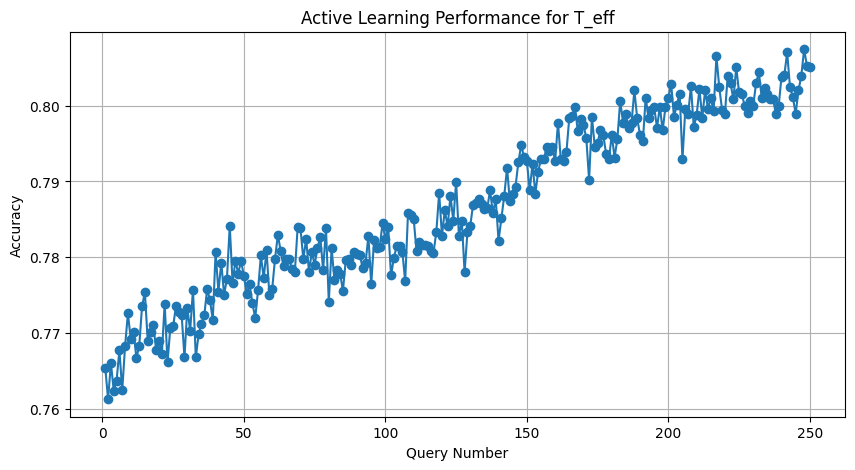

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(query_indices_list_teff, accuracy_score_list_teff, marker='o', label='T_eff')
plt.xlabel('Query Number')
plt.ylabel('Accuracy')
plt.title('Active Learning Performance for T_eff')
plt.grid()
plt.show()

For log(g)

In [34]:
file_name = 'data_output_for_AL_logg.pkl'
n_features = 9
X_train, X_pool, X_test, y_train, y_pool, y_test = u.load_pkl_data_for_AL(file_name)
X_train, X_pool, X_test = X_train[:,:n_features], X_pool[:,:n_features], X_test[:,:n_features]

print(X_train.shape, y_train.shape)
print(X_pool.shape, y_pool.shape)
print(X_test.shape, y_test.shape)

(200, 9) (200,)
(47108, 9) (47108,)
(11777, 9) (11777,)


In [35]:
# Initialize the ActiveLearner
# The ActiveLearner is initialized with a logistic regression model as the base estimator.
learner = ActiveLearner(
    estimator=RandomForestClassifier(n_estimators=200),
    query_strategy=uncertainty_sampling,
    X_training=X_train, y_training=y_train
)

In [36]:
# Check the initial accuracy of the model
# The initial accuracy is calculated on the test set before any active learning queries.
initial_accuracy = learner.score(X_test, y_test)
print(f'Initial Accuracy: {initial_accuracy:.4f}')

Initial Accuracy: 0.6246


In [37]:
n_queries = 250  # Number of queries to perform
query_indices_list_logg,accuracy_score_list_logg =[],[]
# The number of queries to perform in the active learning loop.
for i in range(n_queries):
    query_idx, query_instance = learner.query(X_pool)
    learner.teach(X_pool[query_idx], y_pool[query_idx])

    # Remove the labeled point from the pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx, axis=0)

    # Predictions on test set
    y_pred = learner.predict(X_test)

    # Accuracy
    acc = learner.score(X_test, y_test)
    accuracy_score_list_logg.append(acc)
    query_indices_list_logg.append(i+1)
    print(f"\n Query {i+1} — Accuracy: {acc:.4f}")
    print(f"size of train : {X_train.shape[0]} , size of pool : {X_pool.shape[0]}, size of test : {X_test.shape[0]}")

    # cm = confusion_matrix(y_test, y_pred,labels=[0,1,2,3,4,5,6])

    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["C1", "C2", "C3", "C4", "C5", "C6"])

    # disp.plot(cmap=plt.cm.Blues)
    # plt.title(f"Confusion Matrix — Query {i+1} — Accuracy: {acc:.4f}", fontsize=12, pad=20)
    # plt.xlabel('Prediction', fontsize=11)
    # plt.ylabel('Actual', fontsize=11)
    # plt.gca().xaxis.set_label_position('top')
    # plt.gca().xaxis.tick_top()
    # plt.gca().figure.subplots_adjust(bottom=0.1)
    # # plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)

    # plt.show()


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 1 — Accuracy: 0.6195
size of train : 200 , size of pool : 47107, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 2 — Accuracy: 0.6203
size of train : 200 , size of pool : 47106, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 3 — Accuracy: 0.6232
size of train : 200 , size of pool : 47105, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 4 — Accuracy: 0.6311
size of train : 200 , size of pool : 47104, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 5 — Accuracy: 0.6246
size of train : 200 , size of pool : 47103, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 6 — Accuracy: 0.6319
size of train : 200 , size of pool : 47102, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 7 — Accuracy: 0.6274
size of train : 200 , size of pool : 47101, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 8 — Accuracy: 0.6312
size of train : 200 , size of pool : 47100, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 9 — Accuracy: 0.6306
size of train : 200 , size of pool : 47099, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 10 — Accuracy: 0.6284
size of train : 200 , size of pool : 47098, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 11 — Accuracy: 0.6313
size of train : 200 , size of pool : 47097, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 12 — Accuracy: 0.6269
size of train : 200 , size of pool : 47096, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 13 — Accuracy: 0.6298
size of train : 200 , size of pool : 47095, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 14 — Accuracy: 0.6302
size of train : 200 , size of pool : 47094, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 15 — Accuracy: 0.6269
size of train : 200 , size of pool : 47093, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 16 — Accuracy: 0.6302
size of train : 200 , size of pool : 47092, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 17 — Accuracy: 0.6310
size of train : 200 , size of pool : 47091, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 18 — Accuracy: 0.6306
size of train : 200 , size of pool : 47090, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 19 — Accuracy: 0.6255
size of train : 200 , size of pool : 47089, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 20 — Accuracy: 0.6285
size of train : 200 , size of pool : 47088, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 21 — Accuracy: 0.6300
size of train : 200 , size of pool : 47087, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 22 — Accuracy: 0.6312
size of train : 200 , size of pool : 47086, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 23 — Accuracy: 0.6287
size of train : 200 , size of pool : 47085, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 24 — Accuracy: 0.6272
size of train : 200 , size of pool : 47084, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 25 — Accuracy: 0.6274
size of train : 200 , size of pool : 47083, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 26 — Accuracy: 0.6281
size of train : 200 , size of pool : 47082, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 27 — Accuracy: 0.6267
size of train : 200 , size of pool : 47081, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 28 — Accuracy: 0.6270
size of train : 200 , size of pool : 47080, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 29 — Accuracy: 0.6255
size of train : 200 , size of pool : 47079, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 30 — Accuracy: 0.6295
size of train : 200 , size of pool : 47078, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 31 — Accuracy: 0.6257
size of train : 200 , size of pool : 47077, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 32 — Accuracy: 0.6249
size of train : 200 , size of pool : 47076, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 33 — Accuracy: 0.6277
size of train : 200 , size of pool : 47075, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 34 — Accuracy: 0.6345
size of train : 200 , size of pool : 47074, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 35 — Accuracy: 0.6276
size of train : 200 , size of pool : 47073, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 36 — Accuracy: 0.6261
size of train : 200 , size of pool : 47072, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 37 — Accuracy: 0.6307
size of train : 200 , size of pool : 47071, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 38 — Accuracy: 0.6255
size of train : 200 , size of pool : 47070, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 39 — Accuracy: 0.6280
size of train : 200 , size of pool : 47069, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 40 — Accuracy: 0.6272
size of train : 200 , size of pool : 47068, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 41 — Accuracy: 0.6275
size of train : 200 , size of pool : 47067, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 42 — Accuracy: 0.6309
size of train : 200 , size of pool : 47066, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 43 — Accuracy: 0.6262
size of train : 200 , size of pool : 47065, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 44 — Accuracy: 0.6321
size of train : 200 , size of pool : 47064, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 45 — Accuracy: 0.6319
size of train : 200 , size of pool : 47063, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 46 — Accuracy: 0.6356
size of train : 200 , size of pool : 47062, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 47 — Accuracy: 0.6289
size of train : 200 , size of pool : 47061, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 48 — Accuracy: 0.6298
size of train : 200 , size of pool : 47060, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 49 — Accuracy: 0.6274
size of train : 200 , size of pool : 47059, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 50 — Accuracy: 0.6358
size of train : 200 , size of pool : 47058, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 51 — Accuracy: 0.6323
size of train : 200 , size of pool : 47057, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 52 — Accuracy: 0.6293
size of train : 200 , size of pool : 47056, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 53 — Accuracy: 0.6306
size of train : 200 , size of pool : 47055, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 54 — Accuracy: 0.6343
size of train : 200 , size of pool : 47054, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 55 — Accuracy: 0.6369
size of train : 200 , size of pool : 47053, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 56 — Accuracy: 0.6295
size of train : 200 , size of pool : 47052, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 57 — Accuracy: 0.6373
size of train : 200 , size of pool : 47051, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 58 — Accuracy: 0.6338
size of train : 200 , size of pool : 47050, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 59 — Accuracy: 0.6323
size of train : 200 , size of pool : 47049, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 60 — Accuracy: 0.6385
size of train : 200 , size of pool : 47048, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 61 — Accuracy: 0.6351
size of train : 200 , size of pool : 47047, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 62 — Accuracy: 0.6300
size of train : 200 , size of pool : 47046, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 63 — Accuracy: 0.6322
size of train : 200 , size of pool : 47045, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 64 — Accuracy: 0.6347
size of train : 200 , size of pool : 47044, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 65 — Accuracy: 0.6317
size of train : 200 , size of pool : 47043, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 66 — Accuracy: 0.6332
size of train : 200 , size of pool : 47042, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 67 — Accuracy: 0.6306
size of train : 200 , size of pool : 47041, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 68 — Accuracy: 0.6380
size of train : 200 , size of pool : 47040, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 69 — Accuracy: 0.6290
size of train : 200 , size of pool : 47039, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 70 — Accuracy: 0.6281
size of train : 200 , size of pool : 47038, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 71 — Accuracy: 0.6329
size of train : 200 , size of pool : 47037, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 72 — Accuracy: 0.6355
size of train : 200 , size of pool : 47036, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 73 — Accuracy: 0.6365
size of train : 200 , size of pool : 47035, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 74 — Accuracy: 0.6352
size of train : 200 , size of pool : 47034, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 75 — Accuracy: 0.6368
size of train : 200 , size of pool : 47033, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 76 — Accuracy: 0.6374
size of train : 200 , size of pool : 47032, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 77 — Accuracy: 0.6305
size of train : 200 , size of pool : 47031, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 78 — Accuracy: 0.6302
size of train : 200 , size of pool : 47030, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 79 — Accuracy: 0.6347
size of train : 200 , size of pool : 47029, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 80 — Accuracy: 0.6391
size of train : 200 , size of pool : 47028, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 81 — Accuracy: 0.6329
size of train : 200 , size of pool : 47027, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 82 — Accuracy: 0.6360
size of train : 200 , size of pool : 47026, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 83 — Accuracy: 0.6321
size of train : 200 , size of pool : 47025, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 84 — Accuracy: 0.6405
size of train : 200 , size of pool : 47024, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 85 — Accuracy: 0.6356
size of train : 200 , size of pool : 47023, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 86 — Accuracy: 0.6334
size of train : 200 , size of pool : 47022, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 87 — Accuracy: 0.6344
size of train : 200 , size of pool : 47021, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 88 — Accuracy: 0.6340
size of train : 200 , size of pool : 47020, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 89 — Accuracy: 0.6389
size of train : 200 , size of pool : 47019, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 90 — Accuracy: 0.6336
size of train : 200 , size of pool : 47018, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 91 — Accuracy: 0.6364
size of train : 200 , size of pool : 47017, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 92 — Accuracy: 0.6323
size of train : 200 , size of pool : 47016, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 93 — Accuracy: 0.6377
size of train : 200 , size of pool : 47015, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 94 — Accuracy: 0.6358
size of train : 200 , size of pool : 47014, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 95 — Accuracy: 0.6358
size of train : 200 , size of pool : 47013, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 96 — Accuracy: 0.6352
size of train : 200 , size of pool : 47012, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 97 — Accuracy: 0.6384
size of train : 200 , size of pool : 47011, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 98 — Accuracy: 0.6375
size of train : 200 , size of pool : 47010, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 99 — Accuracy: 0.6334
size of train : 200 , size of pool : 47009, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 100 — Accuracy: 0.6351
size of train : 200 , size of pool : 47008, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 101 — Accuracy: 0.6352
size of train : 200 , size of pool : 47007, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 102 — Accuracy: 0.6374
size of train : 200 , size of pool : 47006, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 103 — Accuracy: 0.6456
size of train : 200 , size of pool : 47005, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 104 — Accuracy: 0.6419
size of train : 200 , size of pool : 47004, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 105 — Accuracy: 0.6444
size of train : 200 , size of pool : 47003, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 106 — Accuracy: 0.6463
size of train : 200 , size of pool : 47002, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 107 — Accuracy: 0.6459
size of train : 200 , size of pool : 47001, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 108 — Accuracy: 0.6444
size of train : 200 , size of pool : 47000, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 109 — Accuracy: 0.6418
size of train : 200 , size of pool : 46999, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 110 — Accuracy: 0.6424
size of train : 200 , size of pool : 46998, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 111 — Accuracy: 0.6450
size of train : 200 , size of pool : 46997, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 112 — Accuracy: 0.6435
size of train : 200 , size of pool : 46996, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 113 — Accuracy: 0.6456
size of train : 200 , size of pool : 46995, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 114 — Accuracy: 0.6412
size of train : 200 , size of pool : 46994, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 115 — Accuracy: 0.6432
size of train : 200 , size of pool : 46993, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 116 — Accuracy: 0.6467
size of train : 200 , size of pool : 46992, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 117 — Accuracy: 0.6435
size of train : 200 , size of pool : 46991, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 118 — Accuracy: 0.6463
size of train : 200 , size of pool : 46990, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 119 — Accuracy: 0.6425
size of train : 200 , size of pool : 46989, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 120 — Accuracy: 0.6464
size of train : 200 , size of pool : 46988, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 121 — Accuracy: 0.6451
size of train : 200 , size of pool : 46987, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 122 — Accuracy: 0.6458
size of train : 200 , size of pool : 46986, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 123 — Accuracy: 0.6455
size of train : 200 , size of pool : 46985, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 124 — Accuracy: 0.6455
size of train : 200 , size of pool : 46984, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 125 — Accuracy: 0.6463
size of train : 200 , size of pool : 46983, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 126 — Accuracy: 0.6469
size of train : 200 , size of pool : 46982, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 127 — Accuracy: 0.6469
size of train : 200 , size of pool : 46981, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 128 — Accuracy: 0.6469
size of train : 200 , size of pool : 46980, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 129 — Accuracy: 0.6457
size of train : 200 , size of pool : 46979, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 130 — Accuracy: 0.6491
size of train : 200 , size of pool : 46978, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 131 — Accuracy: 0.6451
size of train : 200 , size of pool : 46977, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 132 — Accuracy: 0.6488
size of train : 200 , size of pool : 46976, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 133 — Accuracy: 0.6486
size of train : 200 , size of pool : 46975, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 134 — Accuracy: 0.6485
size of train : 200 , size of pool : 46974, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 135 — Accuracy: 0.6476
size of train : 200 , size of pool : 46973, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 136 — Accuracy: 0.6491
size of train : 200 , size of pool : 46972, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 137 — Accuracy: 0.6474
size of train : 200 , size of pool : 46971, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 138 — Accuracy: 0.6459
size of train : 200 , size of pool : 46970, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 139 — Accuracy: 0.6455
size of train : 200 , size of pool : 46969, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 140 — Accuracy: 0.6494
size of train : 200 , size of pool : 46968, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 141 — Accuracy: 0.6491
size of train : 200 , size of pool : 46967, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 142 — Accuracy: 0.6483
size of train : 200 , size of pool : 46966, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 143 — Accuracy: 0.6488
size of train : 200 , size of pool : 46965, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 144 — Accuracy: 0.6502
size of train : 200 , size of pool : 46964, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 145 — Accuracy: 0.6491
size of train : 200 , size of pool : 46963, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 146 — Accuracy: 0.6481
size of train : 200 , size of pool : 46962, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 147 — Accuracy: 0.6495
size of train : 200 , size of pool : 46961, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 148 — Accuracy: 0.6478
size of train : 200 , size of pool : 46960, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 149 — Accuracy: 0.6489
size of train : 200 , size of pool : 46959, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 150 — Accuracy: 0.6481
size of train : 200 , size of pool : 46958, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 151 — Accuracy: 0.6486
size of train : 200 , size of pool : 46957, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 152 — Accuracy: 0.6475
size of train : 200 , size of pool : 46956, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 153 — Accuracy: 0.6504
size of train : 200 , size of pool : 46955, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 154 — Accuracy: 0.6465
size of train : 200 , size of pool : 46954, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 155 — Accuracy: 0.6454
size of train : 200 , size of pool : 46953, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 156 — Accuracy: 0.6504
size of train : 200 , size of pool : 46952, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 157 — Accuracy: 0.6507
size of train : 200 , size of pool : 46951, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 158 — Accuracy: 0.6524
size of train : 200 , size of pool : 46950, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 159 — Accuracy: 0.6496
size of train : 200 , size of pool : 46949, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 160 — Accuracy: 0.6505
size of train : 200 , size of pool : 46948, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 161 — Accuracy: 0.6510
size of train : 200 , size of pool : 46947, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 162 — Accuracy: 0.6476
size of train : 200 , size of pool : 46946, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 163 — Accuracy: 0.6458
size of train : 200 , size of pool : 46945, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 164 — Accuracy: 0.6476
size of train : 200 , size of pool : 46944, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 165 — Accuracy: 0.6446
size of train : 200 , size of pool : 46943, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 166 — Accuracy: 0.6496
size of train : 200 , size of pool : 46942, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 167 — Accuracy: 0.6456
size of train : 200 , size of pool : 46941, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 168 — Accuracy: 0.6506
size of train : 200 , size of pool : 46940, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 169 — Accuracy: 0.6506
size of train : 200 , size of pool : 46939, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 170 — Accuracy: 0.6473
size of train : 200 , size of pool : 46938, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 171 — Accuracy: 0.6485
size of train : 200 , size of pool : 46937, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 172 — Accuracy: 0.6494
size of train : 200 , size of pool : 46936, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 173 — Accuracy: 0.6480
size of train : 200 , size of pool : 46935, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 174 — Accuracy: 0.6471
size of train : 200 , size of pool : 46934, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 175 — Accuracy: 0.6435
size of train : 200 , size of pool : 46933, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 176 — Accuracy: 0.6474
size of train : 200 , size of pool : 46932, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 177 — Accuracy: 0.6513
size of train : 200 , size of pool : 46931, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 178 — Accuracy: 0.6503
size of train : 200 , size of pool : 46930, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 179 — Accuracy: 0.6475
size of train : 200 , size of pool : 46929, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 180 — Accuracy: 0.6487
size of train : 200 , size of pool : 46928, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 181 — Accuracy: 0.6461
size of train : 200 , size of pool : 46927, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 182 — Accuracy: 0.6491
size of train : 200 , size of pool : 46926, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 183 — Accuracy: 0.6479
size of train : 200 , size of pool : 46925, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 184 — Accuracy: 0.6529
size of train : 200 , size of pool : 46924, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 185 — Accuracy: 0.6482
size of train : 200 , size of pool : 46923, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 186 — Accuracy: 0.6480
size of train : 200 , size of pool : 46922, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 187 — Accuracy: 0.6531
size of train : 200 , size of pool : 46921, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 188 — Accuracy: 0.6504
size of train : 200 , size of pool : 46920, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 189 — Accuracy: 0.6500
size of train : 200 , size of pool : 46919, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 190 — Accuracy: 0.6491
size of train : 200 , size of pool : 46918, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 191 — Accuracy: 0.6508
size of train : 200 , size of pool : 46917, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 192 — Accuracy: 0.6497
size of train : 200 , size of pool : 46916, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 193 — Accuracy: 0.6478
size of train : 200 , size of pool : 46915, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 194 — Accuracy: 0.6496
size of train : 200 , size of pool : 46914, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 195 — Accuracy: 0.6508
size of train : 200 , size of pool : 46913, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 196 — Accuracy: 0.6465
size of train : 200 , size of pool : 46912, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 197 — Accuracy: 0.6493
size of train : 200 , size of pool : 46911, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 198 — Accuracy: 0.6488
size of train : 200 , size of pool : 46910, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 199 — Accuracy: 0.6488
size of train : 200 , size of pool : 46909, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 200 — Accuracy: 0.6472
size of train : 200 , size of pool : 46908, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 201 — Accuracy: 0.6446
size of train : 200 , size of pool : 46907, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 202 — Accuracy: 0.6434
size of train : 200 , size of pool : 46906, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 203 — Accuracy: 0.6477
size of train : 200 , size of pool : 46905, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 204 — Accuracy: 0.6441
size of train : 200 , size of pool : 46904, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 205 — Accuracy: 0.6478
size of train : 200 , size of pool : 46903, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 206 — Accuracy: 0.6499
size of train : 200 , size of pool : 46902, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 207 — Accuracy: 0.6488
size of train : 200 , size of pool : 46901, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 208 — Accuracy: 0.6490
size of train : 200 , size of pool : 46900, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 209 — Accuracy: 0.6476
size of train : 200 , size of pool : 46899, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 210 — Accuracy: 0.6491
size of train : 200 , size of pool : 46898, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 211 — Accuracy: 0.6480
size of train : 200 , size of pool : 46897, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 212 — Accuracy: 0.6476
size of train : 200 , size of pool : 46896, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 213 — Accuracy: 0.6478
size of train : 200 , size of pool : 46895, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 214 — Accuracy: 0.6454
size of train : 200 , size of pool : 46894, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 215 — Accuracy: 0.6477
size of train : 200 , size of pool : 46893, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 216 — Accuracy: 0.6471
size of train : 200 , size of pool : 46892, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 217 — Accuracy: 0.6498
size of train : 200 , size of pool : 46891, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 218 — Accuracy: 0.6463
size of train : 200 , size of pool : 46890, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 219 — Accuracy: 0.6463
size of train : 200 , size of pool : 46889, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 220 — Accuracy: 0.6458
size of train : 200 , size of pool : 46888, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 221 — Accuracy: 0.6483
size of train : 200 , size of pool : 46887, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 222 — Accuracy: 0.6485
size of train : 200 , size of pool : 46886, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 223 — Accuracy: 0.6460
size of train : 200 , size of pool : 46885, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 224 — Accuracy: 0.6482
size of train : 200 , size of pool : 46884, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 225 — Accuracy: 0.6418
size of train : 200 , size of pool : 46883, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 226 — Accuracy: 0.6449
size of train : 200 , size of pool : 46882, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 227 — Accuracy: 0.6446
size of train : 200 , size of pool : 46881, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 228 — Accuracy: 0.6470
size of train : 200 , size of pool : 46880, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 229 — Accuracy: 0.6437
size of train : 200 , size of pool : 46879, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 230 — Accuracy: 0.6455
size of train : 200 , size of pool : 46878, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 231 — Accuracy: 0.6497
size of train : 200 , size of pool : 46877, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 232 — Accuracy: 0.6467
size of train : 200 , size of pool : 46876, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 233 — Accuracy: 0.6457
size of train : 200 , size of pool : 46875, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 234 — Accuracy: 0.6503
size of train : 200 , size of pool : 46874, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 235 — Accuracy: 0.6483
size of train : 200 , size of pool : 46873, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 236 — Accuracy: 0.6494
size of train : 200 , size of pool : 46872, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 237 — Accuracy: 0.6524
size of train : 200 , size of pool : 46871, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 238 — Accuracy: 0.6491
size of train : 200 , size of pool : 46870, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 239 — Accuracy: 0.6478
size of train : 200 , size of pool : 46869, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 240 — Accuracy: 0.6522
size of train : 200 , size of pool : 46868, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 241 — Accuracy: 0.6523
size of train : 200 , size of pool : 46867, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 242 — Accuracy: 0.6537
size of train : 200 , size of pool : 46866, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 243 — Accuracy: 0.6514
size of train : 200 , size of pool : 46865, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 244 — Accuracy: 0.6525
size of train : 200 , size of pool : 46864, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 245 — Accuracy: 0.6522
size of train : 200 , size of pool : 46863, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 246 — Accuracy: 0.6548
size of train : 200 , size of pool : 46862, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 247 — Accuracy: 0.6512
size of train : 200 , size of pool : 46861, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 248 — Accuracy: 0.6519
size of train : 200 , size of pool : 46860, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 249 — Accuracy: 0.6536
size of train : 200 , size of pool : 46859, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 250 — Accuracy: 0.6527
size of train : 200 , size of pool : 46858, size of test : 11777


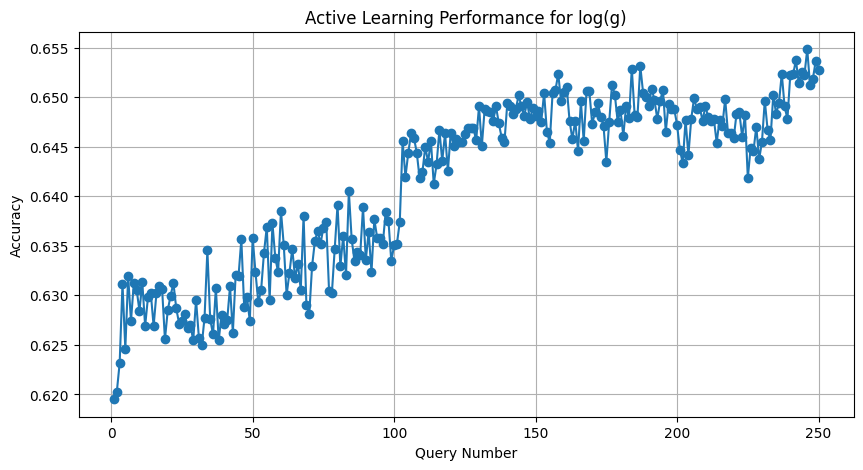

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(query_indices_list_logg, accuracy_score_list_logg, marker='o', label='log(g)')
plt.xlabel('Query Number')
plt.ylabel('Accuracy')
plt.title('Active Learning Performance for log(g)')
plt.grid()
plt.show()

For Fe/H

In [39]:
file_name = 'data_output_for_AL_feh.pkl'
n_features = 9
X_train, X_pool, X_test, y_train, y_pool, y_test = u.load_pkl_data_for_AL(file_name)
X_train, X_pool, X_test = X_train[:,:n_features], X_pool[:,:n_features], X_test[:,:n_features]

print(X_train.shape, y_train.shape)
print(X_pool.shape, y_pool.shape)
print(X_test.shape, y_test.shape)

(200, 9) (200,)
(47108, 9) (47108,)
(11777, 9) (11777,)


In [40]:
# Initialize the ActiveLearner
# The ActiveLearner is initialized with a logistic regression model as the base estimator.
learner = ActiveLearner(
    estimator=RandomForestClassifier(n_estimators=200),
    query_strategy=uncertainty_sampling,
    X_training=X_train, y_training=y_train
)

In [41]:
# Check the initial accuracy of the model
# The initial accuracy is calculated on the test set before any active learning queries.
initial_accuracy = learner.score(X_test, y_test)
print(f'Initial Accuracy: {initial_accuracy:.4f}')

Initial Accuracy: 0.8166


In [42]:
n_queries = 250  # Number of queries to perform
query_indices_list_feh,accuracy_score_list_feh =[],[]
# The number of queries to perform in the active learning loop.
for i in range(n_queries):
    query_idx, query_instance = learner.query(X_pool)
    learner.teach(X_pool[query_idx], y_pool[query_idx])

    # Remove the labeled point from the pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx, axis=0)

    # Predictions on test set
    y_pred = learner.predict(X_test)

    # Accuracy
    acc = learner.score(X_test, y_test)
    accuracy_score_list_feh.append(acc)
    query_indices_list_feh.append(i+1)
    print(f"\n Query {i+1} — Accuracy: {acc:.4f}")
    print(f"size of train : {X_train.shape[0]} , size of pool : {X_pool.shape[0]}, size of test : {X_test.shape[0]}")

    # cm = confusion_matrix(y_test, y_pred,labels=[0,1,2,3,4,5,6])

    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["XMR","MR","MP","XMP"])

    # disp.plot(cmap=plt.cm.Blues)
    # plt.title(f"Confusion Matrix — Query {i+1} — Accuracy: {acc:.4f}", fontsize=12, pad=20)
    # plt.xlabel('Prediction', fontsize=11)
    # plt.ylabel('Actual', fontsize=11)
    # plt.gca().xaxis.set_label_position('top')
    # plt.gca().xaxis.tick_top()
    # plt.gca().figure.subplots_adjust(bottom=0.1)
    # # plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)

    # plt.show()


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 1 — Accuracy: 0.8207
size of train : 200 , size of pool : 47107, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 2 — Accuracy: 0.8177
size of train : 200 , size of pool : 47106, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 3 — Accuracy: 0.8191
size of train : 200 , size of pool : 47105, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 4 — Accuracy: 0.8187
size of train : 200 , size of pool : 47104, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 5 — Accuracy: 0.8193
size of train : 200 , size of pool : 47103, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 6 — Accuracy: 0.8221
size of train : 200 , size of pool : 47102, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 7 — Accuracy: 0.8194
size of train : 200 , size of pool : 47101, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 8 — Accuracy: 0.8216
size of train : 200 , size of pool : 47100, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 9 — Accuracy: 0.8237
size of train : 200 , size of pool : 47099, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 10 — Accuracy: 0.8184
size of train : 200 , size of pool : 47098, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 11 — Accuracy: 0.8191
size of train : 200 , size of pool : 47097, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 12 — Accuracy: 0.8200
size of train : 200 , size of pool : 47096, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 13 — Accuracy: 0.8157
size of train : 200 , size of pool : 47095, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 14 — Accuracy: 0.8185
size of train : 200 , size of pool : 47094, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 15 — Accuracy: 0.8157
size of train : 200 , size of pool : 47093, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 16 — Accuracy: 0.8140
size of train : 200 , size of pool : 47092, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 17 — Accuracy: 0.8155
size of train : 200 , size of pool : 47091, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 18 — Accuracy: 0.8173
size of train : 200 , size of pool : 47090, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 19 — Accuracy: 0.8159
size of train : 200 , size of pool : 47089, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 20 — Accuracy: 0.8116
size of train : 200 , size of pool : 47088, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 21 — Accuracy: 0.8141
size of train : 200 , size of pool : 47087, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 22 — Accuracy: 0.8132
size of train : 200 , size of pool : 47086, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 23 — Accuracy: 0.8143
size of train : 200 , size of pool : 47085, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 24 — Accuracy: 0.8151
size of train : 200 , size of pool : 47084, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 25 — Accuracy: 0.8168
size of train : 200 , size of pool : 47083, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 26 — Accuracy: 0.8129
size of train : 200 , size of pool : 47082, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 27 — Accuracy: 0.8157
size of train : 200 , size of pool : 47081, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 28 — Accuracy: 0.8171
size of train : 200 , size of pool : 47080, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 29 — Accuracy: 0.8141
size of train : 200 , size of pool : 47079, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 30 — Accuracy: 0.8151
size of train : 200 , size of pool : 47078, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 31 — Accuracy: 0.8164
size of train : 200 , size of pool : 47077, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 32 — Accuracy: 0.8134
size of train : 200 , size of pool : 47076, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 33 — Accuracy: 0.8150
size of train : 200 , size of pool : 47075, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 34 — Accuracy: 0.8123
size of train : 200 , size of pool : 47074, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 35 — Accuracy: 0.8164
size of train : 200 , size of pool : 47073, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 36 — Accuracy: 0.8159
size of train : 200 , size of pool : 47072, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 37 — Accuracy: 0.8143
size of train : 200 , size of pool : 47071, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 38 — Accuracy: 0.8137
size of train : 200 , size of pool : 47070, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 39 — Accuracy: 0.8139
size of train : 200 , size of pool : 47069, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 40 — Accuracy: 0.8124
size of train : 200 , size of pool : 47068, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 41 — Accuracy: 0.8145
size of train : 200 , size of pool : 47067, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 42 — Accuracy: 0.8173
size of train : 200 , size of pool : 47066, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 43 — Accuracy: 0.8157
size of train : 200 , size of pool : 47065, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 44 — Accuracy: 0.8143
size of train : 200 , size of pool : 47064, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 45 — Accuracy: 0.8153
size of train : 200 , size of pool : 47063, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 46 — Accuracy: 0.8168
size of train : 200 , size of pool : 47062, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 47 — Accuracy: 0.8167
size of train : 200 , size of pool : 47061, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 48 — Accuracy: 0.8185
size of train : 200 , size of pool : 47060, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 49 — Accuracy: 0.8160
size of train : 200 , size of pool : 47059, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 50 — Accuracy: 0.8143
size of train : 200 , size of pool : 47058, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 51 — Accuracy: 0.8165
size of train : 200 , size of pool : 47057, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 52 — Accuracy: 0.8185
size of train : 200 , size of pool : 47056, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 53 — Accuracy: 0.8164
size of train : 200 , size of pool : 47055, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 54 — Accuracy: 0.8168
size of train : 200 , size of pool : 47054, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 55 — Accuracy: 0.8162
size of train : 200 , size of pool : 47053, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 56 — Accuracy: 0.8168
size of train : 200 , size of pool : 47052, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 57 — Accuracy: 0.8167
size of train : 200 , size of pool : 47051, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 58 — Accuracy: 0.8147
size of train : 200 , size of pool : 47050, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 59 — Accuracy: 0.8136
size of train : 200 , size of pool : 47049, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 60 — Accuracy: 0.8147
size of train : 200 , size of pool : 47048, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 61 — Accuracy: 0.8128
size of train : 200 , size of pool : 47047, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 62 — Accuracy: 0.8146
size of train : 200 , size of pool : 47046, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 63 — Accuracy: 0.8156
size of train : 200 , size of pool : 47045, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 64 — Accuracy: 0.8133
size of train : 200 , size of pool : 47044, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 65 — Accuracy: 0.8150
size of train : 200 , size of pool : 47043, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 66 — Accuracy: 0.8126
size of train : 200 , size of pool : 47042, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 67 — Accuracy: 0.8155
size of train : 200 , size of pool : 47041, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 68 — Accuracy: 0.8134
size of train : 200 , size of pool : 47040, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 69 — Accuracy: 0.8154
size of train : 200 , size of pool : 47039, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 70 — Accuracy: 0.8139
size of train : 200 , size of pool : 47038, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 71 — Accuracy: 0.8179
size of train : 200 , size of pool : 47037, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 72 — Accuracy: 0.8165
size of train : 200 , size of pool : 47036, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 73 — Accuracy: 0.8160
size of train : 200 , size of pool : 47035, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 74 — Accuracy: 0.8156
size of train : 200 , size of pool : 47034, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 75 — Accuracy: 0.8161
size of train : 200 , size of pool : 47033, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 76 — Accuracy: 0.8158
size of train : 200 , size of pool : 47032, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 77 — Accuracy: 0.8151
size of train : 200 , size of pool : 47031, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 78 — Accuracy: 0.8159
size of train : 200 , size of pool : 47030, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 79 — Accuracy: 0.8183
size of train : 200 , size of pool : 47029, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 80 — Accuracy: 0.8185
size of train : 200 , size of pool : 47028, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 81 — Accuracy: 0.8213
size of train : 200 , size of pool : 47027, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 82 — Accuracy: 0.8178
size of train : 200 , size of pool : 47026, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 83 — Accuracy: 0.8201
size of train : 200 , size of pool : 47025, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 84 — Accuracy: 0.8162
size of train : 200 , size of pool : 47024, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 85 — Accuracy: 0.8209
size of train : 200 , size of pool : 47023, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 86 — Accuracy: 0.8213
size of train : 200 , size of pool : 47022, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 87 — Accuracy: 0.8223
size of train : 200 , size of pool : 47021, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 88 — Accuracy: 0.8239
size of train : 200 , size of pool : 47020, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 89 — Accuracy: 0.8227
size of train : 200 , size of pool : 47019, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 90 — Accuracy: 0.8217
size of train : 200 , size of pool : 47018, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 91 — Accuracy: 0.8247
size of train : 200 , size of pool : 47017, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 92 — Accuracy: 0.8202
size of train : 200 , size of pool : 47016, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 93 — Accuracy: 0.8217
size of train : 200 , size of pool : 47015, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 94 — Accuracy: 0.8199
size of train : 200 , size of pool : 47014, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 95 — Accuracy: 0.8213
size of train : 200 , size of pool : 47013, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 96 — Accuracy: 0.8239
size of train : 200 , size of pool : 47012, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 97 — Accuracy: 0.8196
size of train : 200 , size of pool : 47011, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 98 — Accuracy: 0.8215
size of train : 200 , size of pool : 47010, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 99 — Accuracy: 0.8202
size of train : 200 , size of pool : 47009, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 100 — Accuracy: 0.8227
size of train : 200 , size of pool : 47008, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 101 — Accuracy: 0.8196
size of train : 200 , size of pool : 47007, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 102 — Accuracy: 0.8213
size of train : 200 , size of pool : 47006, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 103 — Accuracy: 0.8209
size of train : 200 , size of pool : 47005, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 104 — Accuracy: 0.8197
size of train : 200 , size of pool : 47004, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 105 — Accuracy: 0.8221
size of train : 200 , size of pool : 47003, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 106 — Accuracy: 0.8207
size of train : 200 , size of pool : 47002, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 107 — Accuracy: 0.8184
size of train : 200 , size of pool : 47001, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 108 — Accuracy: 0.8218
size of train : 200 , size of pool : 47000, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 109 — Accuracy: 0.8213
size of train : 200 , size of pool : 46999, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 110 — Accuracy: 0.8225
size of train : 200 , size of pool : 46998, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 111 — Accuracy: 0.8237
size of train : 200 , size of pool : 46997, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 112 — Accuracy: 0.8211
size of train : 200 , size of pool : 46996, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 113 — Accuracy: 0.8227
size of train : 200 , size of pool : 46995, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 114 — Accuracy: 0.8201
size of train : 200 , size of pool : 46994, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 115 — Accuracy: 0.8225
size of train : 200 , size of pool : 46993, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 116 — Accuracy: 0.8217
size of train : 200 , size of pool : 46992, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 117 — Accuracy: 0.8216
size of train : 200 , size of pool : 46991, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 118 — Accuracy: 0.8240
size of train : 200 , size of pool : 46990, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 119 — Accuracy: 0.8227
size of train : 200 , size of pool : 46989, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 120 — Accuracy: 0.8215
size of train : 200 , size of pool : 46988, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 121 — Accuracy: 0.8219
size of train : 200 , size of pool : 46987, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 122 — Accuracy: 0.8211
size of train : 200 , size of pool : 46986, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 123 — Accuracy: 0.8197
size of train : 200 , size of pool : 46985, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 124 — Accuracy: 0.8195
size of train : 200 , size of pool : 46984, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 125 — Accuracy: 0.8224
size of train : 200 , size of pool : 46983, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 126 — Accuracy: 0.8215
size of train : 200 , size of pool : 46982, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 127 — Accuracy: 0.8221
size of train : 200 , size of pool : 46981, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 128 — Accuracy: 0.8237
size of train : 200 , size of pool : 46980, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 129 — Accuracy: 0.8220
size of train : 200 , size of pool : 46979, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 130 — Accuracy: 0.8247
size of train : 200 , size of pool : 46978, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 131 — Accuracy: 0.8216
size of train : 200 , size of pool : 46977, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 132 — Accuracy: 0.8203
size of train : 200 , size of pool : 46976, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 133 — Accuracy: 0.8213
size of train : 200 , size of pool : 46975, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 134 — Accuracy: 0.8225
size of train : 200 , size of pool : 46974, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 135 — Accuracy: 0.8248
size of train : 200 , size of pool : 46973, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 136 — Accuracy: 0.8247
size of train : 200 , size of pool : 46972, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 137 — Accuracy: 0.8248
size of train : 200 , size of pool : 46971, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 138 — Accuracy: 0.8233
size of train : 200 , size of pool : 46970, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 139 — Accuracy: 0.8233
size of train : 200 , size of pool : 46969, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 140 — Accuracy: 0.8225
size of train : 200 , size of pool : 46968, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 141 — Accuracy: 0.8233
size of train : 200 , size of pool : 46967, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 142 — Accuracy: 0.8225
size of train : 200 , size of pool : 46966, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 143 — Accuracy: 0.8249
size of train : 200 , size of pool : 46965, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 144 — Accuracy: 0.8241
size of train : 200 , size of pool : 46964, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 145 — Accuracy: 0.8245
size of train : 200 , size of pool : 46963, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 146 — Accuracy: 0.8218
size of train : 200 , size of pool : 46962, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 147 — Accuracy: 0.8234
size of train : 200 , size of pool : 46961, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 148 — Accuracy: 0.8263
size of train : 200 , size of pool : 46960, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 149 — Accuracy: 0.8253
size of train : 200 , size of pool : 46959, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 150 — Accuracy: 0.8270
size of train : 200 , size of pool : 46958, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 151 — Accuracy: 0.8229
size of train : 200 , size of pool : 46957, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 152 — Accuracy: 0.8225
size of train : 200 , size of pool : 46956, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 153 — Accuracy: 0.8237
size of train : 200 , size of pool : 46955, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 154 — Accuracy: 0.8222
size of train : 200 , size of pool : 46954, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 155 — Accuracy: 0.8212
size of train : 200 , size of pool : 46953, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 156 — Accuracy: 0.8242
size of train : 200 , size of pool : 46952, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 157 — Accuracy: 0.8275
size of train : 200 , size of pool : 46951, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 158 — Accuracy: 0.8238
size of train : 200 , size of pool : 46950, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 159 — Accuracy: 0.8217
size of train : 200 , size of pool : 46949, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 160 — Accuracy: 0.8229
size of train : 200 , size of pool : 46948, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 161 — Accuracy: 0.8266
size of train : 200 , size of pool : 46947, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 162 — Accuracy: 0.8242
size of train : 200 , size of pool : 46946, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 163 — Accuracy: 0.8235
size of train : 200 , size of pool : 46945, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 164 — Accuracy: 0.8268
size of train : 200 , size of pool : 46944, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 165 — Accuracy: 0.8229
size of train : 200 , size of pool : 46943, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 166 — Accuracy: 0.8236
size of train : 200 , size of pool : 46942, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 167 — Accuracy: 0.8225
size of train : 200 , size of pool : 46941, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 168 — Accuracy: 0.8219
size of train : 200 , size of pool : 46940, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 169 — Accuracy: 0.8199
size of train : 200 , size of pool : 46939, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 170 — Accuracy: 0.8225
size of train : 200 , size of pool : 46938, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 171 — Accuracy: 0.8229
size of train : 200 , size of pool : 46937, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 172 — Accuracy: 0.8232
size of train : 200 , size of pool : 46936, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 173 — Accuracy: 0.8229
size of train : 200 , size of pool : 46935, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 174 — Accuracy: 0.8218
size of train : 200 , size of pool : 46934, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 175 — Accuracy: 0.8236
size of train : 200 , size of pool : 46933, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 176 — Accuracy: 0.8223
size of train : 200 , size of pool : 46932, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 177 — Accuracy: 0.8243
size of train : 200 , size of pool : 46931, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 178 — Accuracy: 0.8223
size of train : 200 , size of pool : 46930, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 179 — Accuracy: 0.8243
size of train : 200 , size of pool : 46929, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 180 — Accuracy: 0.8227
size of train : 200 , size of pool : 46928, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 181 — Accuracy: 0.8207
size of train : 200 , size of pool : 46927, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 182 — Accuracy: 0.8212
size of train : 200 , size of pool : 46926, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 183 — Accuracy: 0.8215
size of train : 200 , size of pool : 46925, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 184 — Accuracy: 0.8242
size of train : 200 , size of pool : 46924, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 185 — Accuracy: 0.8227
size of train : 200 , size of pool : 46923, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 186 — Accuracy: 0.8219
size of train : 200 , size of pool : 46922, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 187 — Accuracy: 0.8218
size of train : 200 , size of pool : 46921, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 188 — Accuracy: 0.8229
size of train : 200 , size of pool : 46920, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 189 — Accuracy: 0.8238
size of train : 200 , size of pool : 46919, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 190 — Accuracy: 0.8226
size of train : 200 , size of pool : 46918, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 191 — Accuracy: 0.8250
size of train : 200 , size of pool : 46917, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 192 — Accuracy: 0.8247
size of train : 200 , size of pool : 46916, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 193 — Accuracy: 0.8231
size of train : 200 , size of pool : 46915, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 194 — Accuracy: 0.8246
size of train : 200 , size of pool : 46914, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 195 — Accuracy: 0.8228
size of train : 200 , size of pool : 46913, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 196 — Accuracy: 0.8257
size of train : 200 , size of pool : 46912, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 197 — Accuracy: 0.8247
size of train : 200 , size of pool : 46911, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 198 — Accuracy: 0.8237
size of train : 200 , size of pool : 46910, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 199 — Accuracy: 0.8240
size of train : 200 , size of pool : 46909, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 200 — Accuracy: 0.8268
size of train : 200 , size of pool : 46908, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 201 — Accuracy: 0.8230
size of train : 200 , size of pool : 46907, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 202 — Accuracy: 0.8226
size of train : 200 , size of pool : 46906, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 203 — Accuracy: 0.8244
size of train : 200 , size of pool : 46905, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 204 — Accuracy: 0.8235
size of train : 200 , size of pool : 46904, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 205 — Accuracy: 0.8254
size of train : 200 , size of pool : 46903, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 206 — Accuracy: 0.8261
size of train : 200 , size of pool : 46902, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 207 — Accuracy: 0.8232
size of train : 200 , size of pool : 46901, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 208 — Accuracy: 0.8253
size of train : 200 , size of pool : 46900, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 209 — Accuracy: 0.8246
size of train : 200 , size of pool : 46899, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 210 — Accuracy: 0.8212
size of train : 200 , size of pool : 46898, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 211 — Accuracy: 0.8252
size of train : 200 , size of pool : 46897, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 212 — Accuracy: 0.8229
size of train : 200 , size of pool : 46896, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 213 — Accuracy: 0.8236
size of train : 200 , size of pool : 46895, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 214 — Accuracy: 0.8232
size of train : 200 , size of pool : 46894, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 215 — Accuracy: 0.8254
size of train : 200 , size of pool : 46893, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 216 — Accuracy: 0.8236
size of train : 200 , size of pool : 46892, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 217 — Accuracy: 0.8247
size of train : 200 , size of pool : 46891, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 218 — Accuracy: 0.8230
size of train : 200 , size of pool : 46890, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 219 — Accuracy: 0.8222
size of train : 200 , size of pool : 46889, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 220 — Accuracy: 0.8254
size of train : 200 , size of pool : 46888, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 221 — Accuracy: 0.8241
size of train : 200 , size of pool : 46887, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 222 — Accuracy: 0.8234
size of train : 200 , size of pool : 46886, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 223 — Accuracy: 0.8230
size of train : 200 , size of pool : 46885, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 224 — Accuracy: 0.8238
size of train : 200 , size of pool : 46884, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 225 — Accuracy: 0.8248
size of train : 200 , size of pool : 46883, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 226 — Accuracy: 0.8229
size of train : 200 , size of pool : 46882, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 227 — Accuracy: 0.8219
size of train : 200 , size of pool : 46881, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 228 — Accuracy: 0.8236
size of train : 200 , size of pool : 46880, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 229 — Accuracy: 0.8254
size of train : 200 , size of pool : 46879, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 230 — Accuracy: 0.8272
size of train : 200 , size of pool : 46878, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 231 — Accuracy: 0.8234
size of train : 200 , size of pool : 46877, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 232 — Accuracy: 0.8236
size of train : 200 , size of pool : 46876, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 233 — Accuracy: 0.8245
size of train : 200 , size of pool : 46875, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 234 — Accuracy: 0.8238
size of train : 200 , size of pool : 46874, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 235 — Accuracy: 0.8213
size of train : 200 , size of pool : 46873, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 236 — Accuracy: 0.8214
size of train : 200 , size of pool : 46872, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 237 — Accuracy: 0.8258
size of train : 200 , size of pool : 46871, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 238 — Accuracy: 0.8261
size of train : 200 , size of pool : 46870, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 239 — Accuracy: 0.8265
size of train : 200 , size of pool : 46869, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 240 — Accuracy: 0.8250
size of train : 200 , size of pool : 46868, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 241 — Accuracy: 0.8242
size of train : 200 , size of pool : 46867, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 242 — Accuracy: 0.8241
size of train : 200 , size of pool : 46866, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 243 — Accuracy: 0.8227
size of train : 200 , size of pool : 46865, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 244 — Accuracy: 0.8249
size of train : 200 , size of pool : 46864, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 245 — Accuracy: 0.8266
size of train : 200 , size of pool : 46863, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 246 — Accuracy: 0.8243
size of train : 200 , size of pool : 46862, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 247 — Accuracy: 0.8246
size of train : 200 , size of pool : 46861, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 248 — Accuracy: 0.8263
size of train : 200 , size of pool : 46860, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 249 — Accuracy: 0.8275
size of train : 200 , size of pool : 46859, size of test : 11777


c:\Users\kisha\anaconda3\envs\astronomy\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Query 250 — Accuracy: 0.8255
size of train : 200 , size of pool : 46858, size of test : 11777


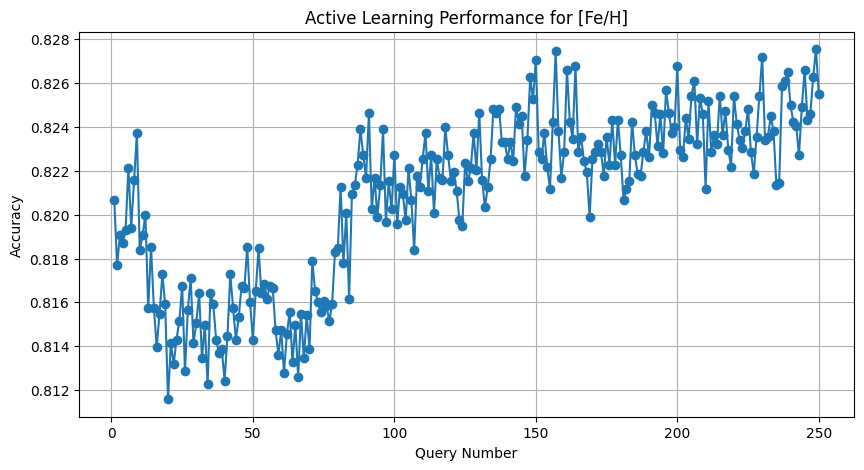

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(query_indices_list_feh, accuracy_score_list_feh, marker='o', label='[Fe/H]')
plt.xlabel('Query Number')
plt.ylabel('Accuracy')
plt.title('Active Learning Performance for [Fe/H]')
plt.grid()
plt.show()